# **Principal Component Analysis**

Principal Component Analyis is basically a statistical procedure to convert a set of observation of possibly correlated variables into a set of values of linearly uncorrelated variables.
Each of the principal components is chosen in such a way so that it would describe most of the still available variance and all these principal components are orthogonal to each other. In all principal components first principal component has maximum variance.

Here I am using the **breast_cancer** dataset from sklearn library

In [0]:
from sklearn import datasets          # To Get load_breast_cancer dataset
from sklearn.decomposition import PCA # here we are importing PCA from sklearn
import pylab as pl                    # combines the numerical module numpy with the graphical plotting module pyplot
from itertools import cycle           # for handling iterators 

In [0]:
dataset = datasets.load_breast_cancer()  # loading breast_cancer dataset
import pandas as pd                      # to organize data in tabular form
df = pd.DataFrame(dataset.data, columns=dataset.feature_names) 
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
numSamples, numFeatures = dataset.data.shape
print(numSamples) # return number of rows
print('\n')
print(numFeatures) # return number of columns.
print('\n')
print(list(dataset.target_names)) # return the target name.

569


30


['malignant', 'benign']


The dataset is consists of two target classes - 'malignant' and 'benign'. 0 and 1 for respective classes.

In [77]:
print(dataset.DESCR) # return the descriptive statistics of dataset, fron out out we can see that no missing values in the dataset.

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [78]:
print(len(dataset.data[dataset.target==1]))

357


The number of instances are 569 and out of them 212 are malignant and 357 are benign.

In [0]:
cancer_df=pd.DataFrame(dataset.data,columns=dataset.feature_names)# just convert the scikit learn data-set to pandas data-frame.
plt.subplot(1,2,1)#fisrt plot
plt.scatter(cancer_df['worst symmetry'], cancer_df['worst texture'], s=cancer_df['worst area']*0.05, color='magenta', label='check', alpha=0.3)
plt.xlabel('Worst Symmetry',fontsize=12)
plt.ylabel('Worst Texture',fontsize=12)
plt.subplot(1,2,2)# 2nd plot
plt.scatter(cancer_df['mean radius'], cancer_df['mean concave points'], s=cancer_df['mean area']*0.05, color='purple', label='check', alpha=0.3)
plt.xlabel('Mean Radius',fontsize=12)
plt.ylabel('Mean Concave Points',fontsize=12)
plt.tight_layout()
plt.show()

In [0]:
X = dataset.data                              # load the dataset values in to x
pca = PCA(n_components=6, whiten=True).fit(X) # fitting the pca model with declaring 6 components.
X_pca = pca.transform(X)                      # tranforming the dataset in to 6 column format with out loosing the variance in the data

In [0]:
print(pca.components_) 

[[ 5.08623202e-03  2.19657026e-03  3.50763298e-02  5.16826469e-01
   4.23694535e-06  4.05260047e-05  8.19399539e-05  4.77807775e-05
   7.07804332e-06 -2.62155251e-06  3.13742507e-04 -6.50984008e-05
   2.23634150e-03  5.57271669e-02 -8.05646029e-07  5.51918197e-06
   8.87094462e-06  3.27915009e-06 -1.24101836e-06 -8.54530832e-08
   7.15473257e-03  3.06736622e-03  4.94576447e-02  8.52063392e-01
   6.42005481e-06  1.01275937e-04  1.68928625e-04  7.36658178e-05
   1.78986262e-05  1.61356159e-06]
 [ 9.28705650e-03 -2.88160658e-03  6.27480827e-02  8.51823720e-01
  -1.48194356e-05 -2.68862249e-06  7.51419574e-05  4.63501038e-05
  -2.52430431e-05 -1.61197148e-05 -5.38692831e-05  3.48370414e-04
   8.19640791e-04  7.51112451e-03  1.49438131e-06  1.27357957e-05
   2.86921009e-05  9.36007477e-06  1.22647432e-05  2.89683790e-07
  -5.68673345e-04 -1.32152605e-02 -1.85961117e-04 -5.19742358e-01
  -7.68565692e-05 -2.56104144e-04 -1.75471479e-04 -3.05051743e-05
  -1.57042845e-04 -5.53071662e-05]
 [-1.2

The fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [74]:
print(pca.explained_variance_ratio_)
print('\n')
print(sum(pca.explained_variance_ratio_))

[0.98204467 0.01617649]


0.9982211613741727


Even after reducing the components in to 6, we've captured 99.9% of the variance in our data.The first dimension defines the 98% of the variance. The second and thired dimension just gives us an around 2% together. Altogether we've only really lost less than 0.01% of the variance in our data by projecting it down to 6 dimensions.


In [0]:
X = dataset.data
pca = PCA(n_components=2, whiten=True).fit(X) # fitting the pca model with first 2 components.
X_pca = pca.transform(X)                      # tranforming the dataset in to 2 column format with out loosing the variance in the data

In [71]:
print(pca.components_)

[[ 5.08623202e-03  2.19657026e-03  3.50763298e-02  5.16826469e-01
   4.23694535e-06  4.05260047e-05  8.19399539e-05  4.77807775e-05
   7.07804332e-06 -2.62155251e-06  3.13742507e-04 -6.50984008e-05
   2.23634150e-03  5.57271669e-02 -8.05646029e-07  5.51918197e-06
   8.87094462e-06  3.27915009e-06 -1.24101836e-06 -8.54530832e-08
   7.15473257e-03  3.06736622e-03  4.94576447e-02  8.52063392e-01
   6.42005481e-06  1.01275937e-04  1.68928625e-04  7.36658178e-05
   1.78986262e-05  1.61356159e-06]
 [ 9.28705650e-03 -2.88160658e-03  6.27480827e-02  8.51823720e-01
  -1.48194356e-05 -2.68862249e-06  7.51419574e-05  4.63501038e-05
  -2.52430431e-05 -1.61197148e-05 -5.38692831e-05  3.48370414e-04
   8.19640791e-04  7.51112451e-03  1.49438131e-06  1.27357957e-05
   2.86921009e-05  9.36007477e-06  1.22647432e-05  2.89683790e-07
  -5.68673345e-04 -1.32152605e-02 -1.85961117e-04 -5.19742358e-01
  -7.68565692e-05 -2.56104144e-04 -1.75471479e-04 -3.05051743e-05
  -1.57042845e-04 -5.53071662e-05]]


In [72]:
print(pca.explained_variance_ratio_)  # return the individual variance of the remaining components.
print('\n')
print(sum(pca.explained_variance_ratio_)) # return the sum variance of the remaining components.

[0.98204467 0.01617649]


0.9982211613741727


Even after reducing the components in to 2, we've captured 99.8% of the variance in our data.The first dimension defines the 98% of the variance. So reducing the number of features in to first principle component it self could preserve 98% of the total variance.

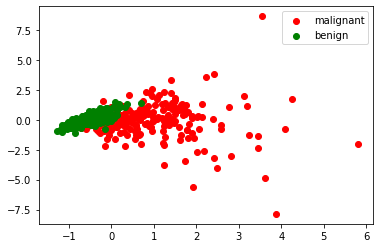

In [0]:
# ploting the dataset after component reduction - the graph is ploted with first principle component in x axis and 2nd component in y axis.

%matplotlib inline    # magic matplotlib for creating scatter plot.
from pylab import *   # importing pylab for supporting matplotlib.

colors = cycle('rgb')
target_ids = range(len(dataset.target_names))
pl.figure()
for i, c, label in zip(target_ids, colors, dataset.target_names):
    pl.scatter(X_pca[dataset.target == i, 0], X_pca[dataset.target == i, 1],
        c=c, label=label)
pl.legend()
pl.show()
    

From the plot its clear that, two different types of cancer type are still clustered pretty well. The two classes are well separated with the first 2 principal components as new features. As good as it seems like, even a linear classifier could do very well to identify a class from the test set. One important feature is how the malignant class is spread out compared to benign